### TSE228  Signal Processing. Lab 1, Spring 2025

## 5 Lab Exercise: Direction finding 



## 1)
Distance from vehicle at $x_v$ to microphone M1
\begin{align}
  r_1^2 &= (x_v - \tfrac12 d)^2 + y_r^2 & , & & 
  r_1  &= \sqrt{(x_v - \tfrac12 d)^2 + y_r^2}  
\end{align}
and to microphone M2
\begin{align}
  r_2^2 &= (x_v + \tfrac12 d)^2 + y_r^2 & , & & 
  r_2  &= \sqrt{(x_v + \tfrac12 d)^2 + y_r^2}  
\end{align}
Corresponding time delays 
\begin{align}
  t_1 &=  \frac{r_1}{c} = \frac{1}{c} \sqrt{(x_v - \tfrac12 d)^2 + y_r^2} & , & &
  t_2 &=  \frac{r_2}{c} = \frac{1}{c} \sqrt{(x_v + \tfrac12 d)^2 + y_r^2} 
\end{align}
$y_r$=100 m, $d$=0.40 m, and $c$=340 m/s.

The code to plot delays $t_1$ and $t_2$ for $x_v$ from -400 m to +400 m and the result is shown below.
Note that delays $t_1$ and $t_2$ are very similar, the difference between the curves can not be seen on this scale. 


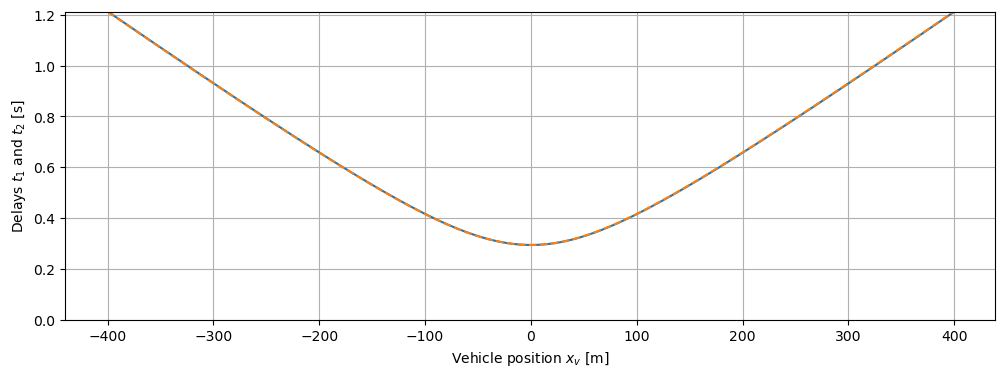

In [4]:
# Imports and defs
import numpy as np
import matplotlib.pyplot as plt
from cmath import pi, exp, sqrt

yr = 100
d = 0.40
c = 340
xv = np.arange(-400, 400, 1)

r1 = np.sqrt( (xv - 1/2*d)**2 + yr**2 )
r2 = np.sqrt( (xv + 1/2*d)**2 + yr**2 )

t1 = r1/c
t2 = r2/c

fig = plt.figure(figsize=([12, 4]))
ax = fig.add_subplot(1, 1, 1)
ax.plot( xv, t1, '-', xv, t2, '--')
ax.grid(True)
ax.set(xlabel = "Vehicle position $x_v$ [m]", 
       ylabel = "Delays $t_1$ and $t_2$ [s]" , 
       ylim = ([0, np.max(t2)]))
ax.grid(True)


## 2)
The signal $s(t)$ emitted by the siren is a sinusoid with zero phase, amplitude $A$=1000, and frequency $f$=400 Hz.

The received signals at the two microphones are 
\begin{align}
  &M1:   & s_1(t) &= s(t-t_1) & &,&
  &M2:   & s_2(t) &= s(t-t_2)
\end{align}
where $t_1$ and $t_2$ are the delays found above.

A time delay $t_d$ is equivalent to a phase shift $\phi$ by the relation
\begin{align}
  t_d &= -\frac{\phi}{2 \pi f} & & ,  & \phi &= -2 \pi f t_d
\end{align}
This can be used to convert the delays $t_1$ and $t_2$ for the two paths $r_1$ and $r_2$ to phase shifts $\phi_1$ and $\phi_2$.

\begin{align}
  \phi_1 &= -2 \pi f t_1 = -\frac{2 \pi f }{c} \sqrt{(x_v - \tfrac12 d)^2 + y_r^2} \\
  \phi_2 &= -2 \pi f t_2 = -\frac{2 \pi f }{c} \sqrt{(x_v + \tfrac12 d)^2 + y_r^2} \\
  \Delta \phi &= \phi_2 - \phi_1 = \frac{2 \pi f }{c} \left( \sqrt{(x_v - \tfrac12 d)^2 + y_r^2} -  \sqrt{(x_v + \tfrac12 d)^2 + y_r^2} \right) 
\end{align}

The values for $\phi_1$ and $\phi_2$ are both around -1500 radians. $2\pi$ radians corespond to one full cycle, so these phase shifts correspond to  around 240 cycles. The curves for $\phi_1$ and $\phi_2$  can hardly be separated.

If we look at the phase *difference* $\Delta \phi$ instead, we notice that $\Delta \phi$ varies from  aproximately -2.5 radians to +2.5 radians as $x_v$ changes. This equals -140 to +140 degrees, which is well within one circle, and the phase shift is unique.

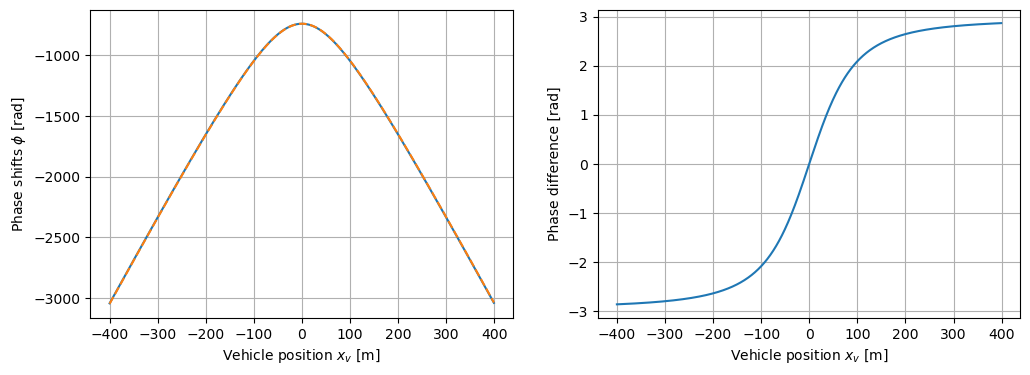

In [7]:
def find_phase(xv, xr, yr, c, f):
    r = np.sqrt( (xv - xr)**2 + yr**2 )
    t = r/c
    phi = -2*pi*f*t

    return phi    


# Start main script
d = 0.40
f = 400

phi_1 = find_phase(xv, -1/2*d, yr, c, f)
phi_2 = find_phase(xv, +1/2*d, yr, c, f)
d_phi = phi_2 - phi_1

fig = plt.figure(figsize=([12, 4]))
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot( xv, phi_1, '-', xv, phi_2, '--')
ax1.set(xlabel = "Vehicle position $x_v$ [m]",
        ylabel= "Phase shifts $\\phi$ [rad]" )
ax1.grid("on")

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot( xv, d_phi)
ax2.set(xlabel = "Vehicle position $x_v$ [m]", 
        ylabel = "Phase difference [rad]", 
        ylim = ([-pi, pi]))
ax2.grid(True)

## 3)
The phases and phase differences ae calculated from the equations in 2)

The code to plot the phasors and print the calculated values is given below.

The values agree with the phasors. Changing sign of $x_v$ causes swapping the phasors for M1 and M2, and changing the sign of the phase difference $\Delta \phi$.

In [1]:
import zplot

A = 1
for xv in [-200, -100, 0, 100, 200]:
    phi_1 = find_phase(xv, -1/2*d, yr, c, f)
    phi_2 = find_phase(xv, +1/2*d, yr, c, f)

    X1 = A*exp(1j*phi_1)
    X2 = A*exp(1j*phi_2)

    ax= zplot.phasor( [X1, X2], frequency=f, include_signal=True, labels=[" M1 ", " M2 "]) 
    ax[0].set_title(f"$x_v$= {xv:.0f} m,   $\Delta \phi$= {(phi_2-phi_1)/pi:.2f}$\pi$")

NameError: name 'find_phase' is not defined

## 4)
The angle $\theta$ as function of the position $x_v$ is
\begin{align}
    \tan \theta &= \frac{x_v}{y_r} & \theta = \arctan \frac{x_v}{y_r}
\end{align}

The path distance difference from the far-field approximation is 
\begin{align}
    \Delta r &= d sin \theta  
\end{align}
The corresponding delay and phase difference is 
\begin{align}
    \Delta t &= \frac{d \sin \theta}{c} & &, &
    \Delta \phi &= 2 \pi f \Delta t = \frac{2 \pi f d \sin \theta}{c} 
\end{align}

The code below calculates and plots this result together with the exact $\Delta \phi$ found above. The two curves match almost perfectly, they cannot be separated at this scale.

The figure below shows the difference between the curves. This is less than than $2 \times 10^{-6}$ radians, which is negligible.


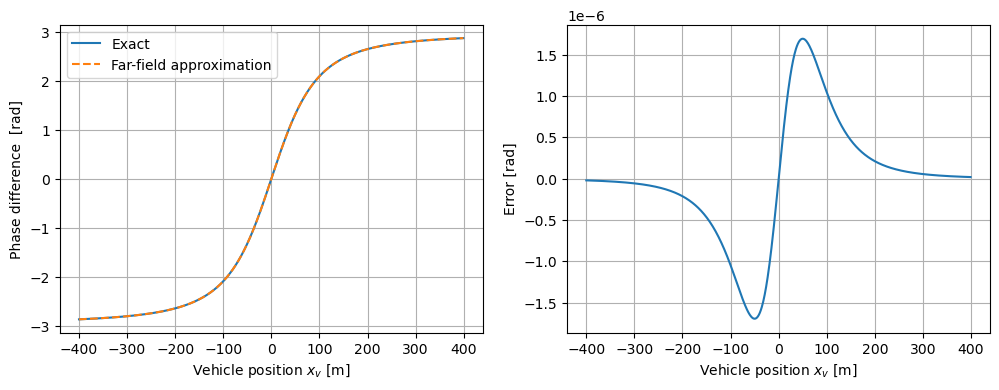

In [62]:
# Correct value
xv = np.arange(-400, 400, 1)

phi_1 = find_phase(xv, -1/2*d, yr, c, f)
phi_2 = find_phase(xv, +1/2*d, yr, c, f)
d_phi = phi_2 - phi_1

fig = plt.figure(figsize=([12, 4]))
ax1 = fig.add_subplot(1, 2, 1)

ax1.plot(xv, d_phi)

# Far-field approximation
theta = np.arctan(xv/yr)
d_phi_f = 2*pi*f * d * np.sin(theta)/c
ax1.plot(xv, d_phi_f, '--')

ax1.set(xlabel = "Vehicle position $x_v$ [m]",
        ylabel= "Phase difference  [rad]", 
        ylim = (-pi, pi) ) 
ax1.grid(True)
ax1.legend(["Exact", "Far-field approximation"]) 

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(xv, (d_phi_f - d_phi))
ax2.set(xlabel = "Vehicle position $x_v$ [m]", 
        ylabel = "Error [rad]")
ax2.grid(True)

## 5)
Consider two phasors $X_1 = A_1 e^{j\phi_1}$ and $X_2 = A_2 e^{j\phi_2}$.
The product of the first phasor and the conjugate of the second is 
\begin{align}
  X_1 X_2^* &= A_1 e^{j\phi_1} \times A_2 e^{-j\phi_2} = A_1 A_2 e^{j (\phi_1 - \phi_2) } \:, \\
  \angle ( X_1 X_2^* ) &= \phi_1 - \phi_2 = -\Delta \phi \:, 
\end{align}
verifying  the result in the exercise.

The minus-sign is caused by the definition of $\Delta \phi$ as $\phi_2 - \phi_1$.

The phase difference as function of angle $\theta$ in the far-field approxiimation was found to
\begin{align}
    \Delta \phi_F &= \frac{2 \pi f d \sin \theta}{c} & &,& 
    \sin \theta_F =  &= \frac{\Delta \phi_F}{2 \pi} \frac{c}{df} = \frac{\Delta \phi_F}{2 \pi} \frac{\lambda}{d} & &,
\end{align}
where we have introduced the wavelength $\lambda = c/f$.

The code below calculates and plots the direction $\theta$ to the source. 

The difference between the result from the far-field approximation and the exact calculated value from the positions is too small to be visible on these plots.




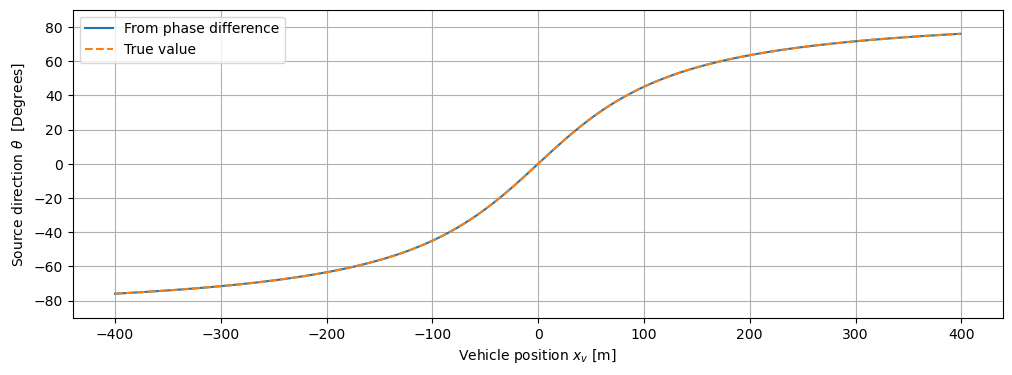

In [64]:
# Phasors
A = 1
X1 = A*np.exp(1j*phi_1)
X2 = A*np.exp(1j*phi_2)

d_phi_x = -np.angle( X1 * X2.conjugate() )

lambda_s = c/f    # Note that lambda is reserved in Python

sin_theta_f = d_phi_x /(2*pi) * lambda_s/(d)
theta_f = np.degrees(np.arcsin(sin_theta_f))

fig = plt.figure(figsize= ([12, 4]))
ax = fig.add_subplot(1, 1, 1)
ax.plot( xv, theta_f, '-')
ax.plot( xv, np.degrees(theta), '--')
ax.set(xlabel = "Vehicle position $x_v$ [m]", 
        ylabel = "Source direction $\\theta$  [Degrees]",
        ylim = (-90, 90))
ax.grid(True)
ax.legend(["From phase difference", "True value"])